For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv), which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the pandas library to import the data into our python environment. This process will be covered in detail in the next section. For now, we'll do this part for you to give you a head start.  

Run the cell below to import the data. 

In [2]:
import pandas as pd
df = pd.read_csv('nhis.csv')
height = list(df['height'])
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


We are only interested in the height column, so we saved as a list and stored in in the variable height in the cell above.

In the cell below:

Print out the number of items in height
Slice and print out the first 10 items from height

In [11]:
print(df['height'].count())
# Expected Output: 4785
print(height[0:10])
 # Expected Output: [74, 70, 61, 68, 66, 98, 99, 70, 65, 64]

4785
[74, 70, 61, 68, 66, 98, 99, 70, 65, 64]


We'll begin by importing the pyplot module from the library matplotlib and setting an alias of plt for it (so that we only have to type  plt. instead of matplotlib.pyplot. each time we want to use it). Note that plt is considered the Standard Alias for matplotlib.

Run the cell below to import matplotlib and use it to create a histogram of our height data, with 8 different bins.

Text(0, 0.5, 'Count')

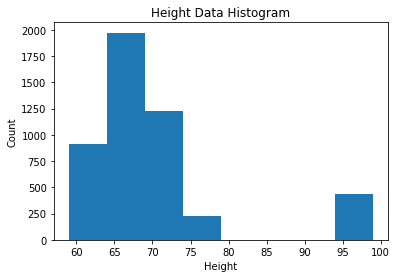

In [20]:
# Import matplotlib and plot histogram for height data
import matplotlib.pyplot as plt
%matplotlib inline  

plt.hist(height,bins=8)
plt.title('Height Data Histogram')
plt.xlabel('Height')
plt.ylabel('Count')
# ^^This is a 'magic command' built into jupyter notebooks. We use it so that the visualization displays 
# in the notebook directly, instead of in a separate window.  

Using the python skills you have learned so far, create a function get_mean() to perform the following tasks:

Input a list of numbers (like the height list we have above)
calculate the sum of numbers and length of the list
Calculate mean from above, round off to 2 decimals and return it.

In [22]:
def get_mean(data):

    mean = sum(data)/len(data)
    
    return round(mean,2)

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_mean(test1)) # 3
print(get_mean(test2)) # 2.5

3.0
2.5


Now we'll test the function by passing in the height list.

In [24]:
# After creating the function, pass the height list to the function 
mean = get_mean(height)
print("Sample Mean:", mean)

# Sample Mean: 69.58

Sample Mean: 69.58


Perform following tasks:

Create a function filter_list() that inputs a list
Perform a for loop to iteratively check and append values to a new list if < 80.
Return the new list

In [26]:
def filter_list(listA):
    
    listB = []
    for element in listA:
        if element<80:
            listB.append(element)    
    return listB

test = [60, 70, 80, 90]
filter_list(test) # [60, 70]

[60, 70]

Great, now we can filter our height list and plot a new histogram for the new list to see if things change considerably. 

In [27]:
filtered_height = filter_list(height)


Now that we have filtered the outliers out of our data, let's recreate our histogram using our filtered data.

In the cell below:

Use filter_list to filter height and store the result in the variable filtered_height
Create a histogram of filtered_height with 8 bins, the same as we did above.
NOTE: You do not need to reimport matplotlib--once it's been imported once, it's stored in memory and can be accessed whenever we like in other cells.

(array([342., 575., 817., 794., 667., 515., 409., 228.]),
 array([59.   , 61.125, 63.25 , 65.375, 67.5  , 69.625, 71.75 , 73.875,
        76.   ]),
 <a list of 8 Patch objects>)

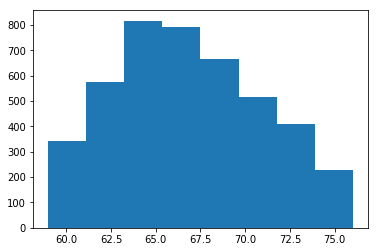

In [30]:
plt.hist(filtered_height, bins = 8)

Since we've filtered our data to remove outliers, we should also recalculate the mean.  Do this now in the cell below. 

In [31]:
# Get the mean of the new list using our get_mean() function
get_mean(filtered_height)

# 66.85

66.85

In the cell below, write a function that takes in an array of numbers and returns the median value for that dataset. Make sure you first check for even / odd and perform computation accordingly. The best approach to calculate the median is as follows:

1. Sort the data. 
2. Check if the data is even or odd. 
3. Calculate the median of the sorted data, now that you know if the data is even or odd. 

(Hint: Recall that you can use modulo operator `%` in python to check if a value is even or odd--odd numbers `% 2` will equal `1`, while even numbers `% 2` will equal `0`!)

In [33]:
def get_median(data):

    data_sorted = sorted(data)

    if len(data_sorted) % 2 == 0:
        val1_index = int((len(data_sorted) / 2) - 1)
        val2_index = val1_index + 1
        return (data_sorted[val1_index] + data_sorted[val2_index]) / 2

    else:
        med_index = (len(data_sorted) // 2) 
        return data_sorted[med_index]

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_median(test1)) # 3
print(get_median(test2)) # 2.5

3
2.5


In [34]:
get_median(height)
# 67

67

In [35]:
def get_mode(data):

    # Create and populate frequency distribution
    frequency_dict = {}
    
    # If an element is not in the dictionary , add it with value 1
    # If an element is already in the dictionary , +1 the value
    for i in data:
        if i not in frequency_dict:
            frequency_dict[i] = 1
        else:
            frequency_dict[i] += 1
    
    # Create alist for mode values
    modes = []
    
    #from the dictionary, add element(s) to the modes list with max frequency
    highest_freq = max(frequency_dict.values())
    for key, val in frequency_dict.items():
        if val == highest_freq:
            modes.append(key)
    # Return the mode list 
    return modes

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_mode(test1)) # [5]
print(get_mode(test2)) # [1, 5]

[5]
[1, 5]


In [36]:
get_mode(height)

[64]

In [38]:
def get_variance(sample):

    # First, calculate the sample mean
    N = len(sample)
    total = sum(sample)
    sample_mean = total/N
    
    # Now, subtract the sample mean from each point and square the result. 
    val_minus_mu_accumulator = 0
    for i in sample:
        val_minus_mu_accumulator += (i - sample_mean)**2
    
    # Divde the total by the number of items in the sample  
    variance = val_minus_mu_accumulator / N
    
    return round(variance, 2)

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_variance(test1)) # 2.22
print(get_mean(test1))  # 3.33
print(get_variance(test2)) # 2.89

2.22
3.33
2.89


In [40]:
get_variance(height)
# 87.73

87.73

In [41]:
from math import sqrt

def get_stddev(list):
    
    stddev = sqrt(get_variance(list))
    
    return round(stddev, 2) 

test = [120,112,131,211,312,90]

print (get_stddev(test))

76.71


In [42]:
get_stddev(height)
# 9.37

9.37

We shall finally build a boxplot for height data and see if it agrees with our understanding for this data that we have developed up to this point. Use the matplotlib's boxplot method with height data and comment on the output

{'whiskers': [<matplotlib.lines.Line2D at 0x1221ce940>,
 'caps': [<matplotlib.lines.Line2D at 0x1221d5a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1221ce2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1221d5160>],
 'fliers': [<matplotlib.lines.Line2D at 0x121e76cc0>],
 'means': []}

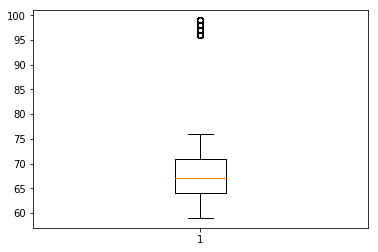

In [43]:
plt.boxplot(height)